# Statistika v30 kogutud andmete kohta

In [48]:
def make_chart(df: DataFrame):
    
    # Determine the height of the chart based on the number of rows (e.g., 0.3 inches per bar)
    height_per_bar = 0.3  # You can adjust this value based on your needs
    chart_height = len(df) * height_per_bar

    # Plotting
    plt.figure(figsize=(10, chart_height))  # Dynamic height based on the number of rows

    bars = plt.barh(df['item'], df['total'], color='skyblue')
    plt.xlabel('Total Count')
    plt.title('Occurrences')

    # Add count labels to the bars
    for bar in bars:
        plt.text(
            bar.get_width(),  # x-coordinate for text
            bar.get_y() + bar.get_height() / 2,  # y-coordinate for text
            f' {int(bar.get_width())}',  # text to be displayed
            va='center'  # center alignment
        )

    plt.gca().invert_yaxis()  # Invert y-axis to show the highest value on top
    plt.show()

In [49]:
import pandas as pd
from pandas import DataFrame
from V30Apriori import V30

v30 = V30(
    "/Users/rabauti/repos/tu/estnltk/syntax_experiments/syntax_experiments__subcat/v30_verb_transactions/v30_koondkorpus_sentences_indexed.db")

## deprel sagedus 

,item,total,percentage
0,punct,18850310,23.418697
1,nsubj,14538740,18.062214
2,obl,12714382,15.795722
3,obj,6832436,8.488282
4,advmod,6567529,8.159174
5,conj,3161270,3.927406
6,mark,3058674,3.799946
7,aux,2892756,3.593818
8,xcomp,2620895,3.256071
9,cc,2203845,2.737948


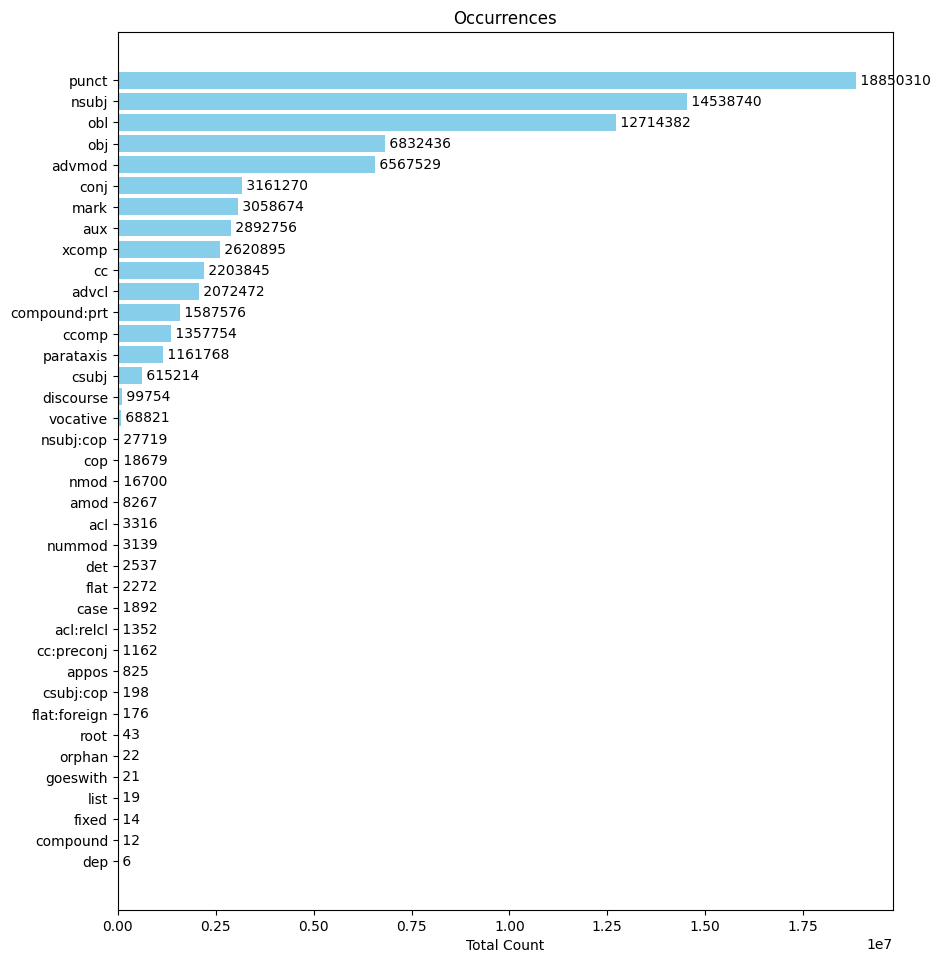

In [60]:

df = pd.read_sql("""
    select 
	deprel as item, count(id) as total
	from `transaction`
    group by deprel
    order by total desc
    """, v30._conn
)
# Calculate percentages
total_sum = df['total'].sum()
df['percentage'] = (df['total'] / total_sum) * 100
df.to_csv('members_deprel_frequency.tsv', sep='\t', index=None)
display(df)
make_chart(df)

## Verb (transaction_head) feats sagedus

,item,total,percentage
0,"af,aux,indic,pres,ps,ps3,sg",2923544,9.719554
1,"af,indic,mod,pres,ps,ps3,sg",2921522,9.712832
2,"af,indic,main,pres,ps,ps3,sg",2919872,9.707347
3,"af,impf,indic,mod,ps,ps3,sg",1958403,6.510866
4,"af,impf,indic,main,ps,ps3,sg",1958075,6.509776
...,...,...,...
128,"af,main,past,ps,quot",9,0.000030
129,"af,aux,past,ps,quot",9,0.000030
130,"af,aux,cond,past,pl,ps,ps2",9,0.000030
131,"af,cond,main,past,pl,ps,ps2",8,0.000027


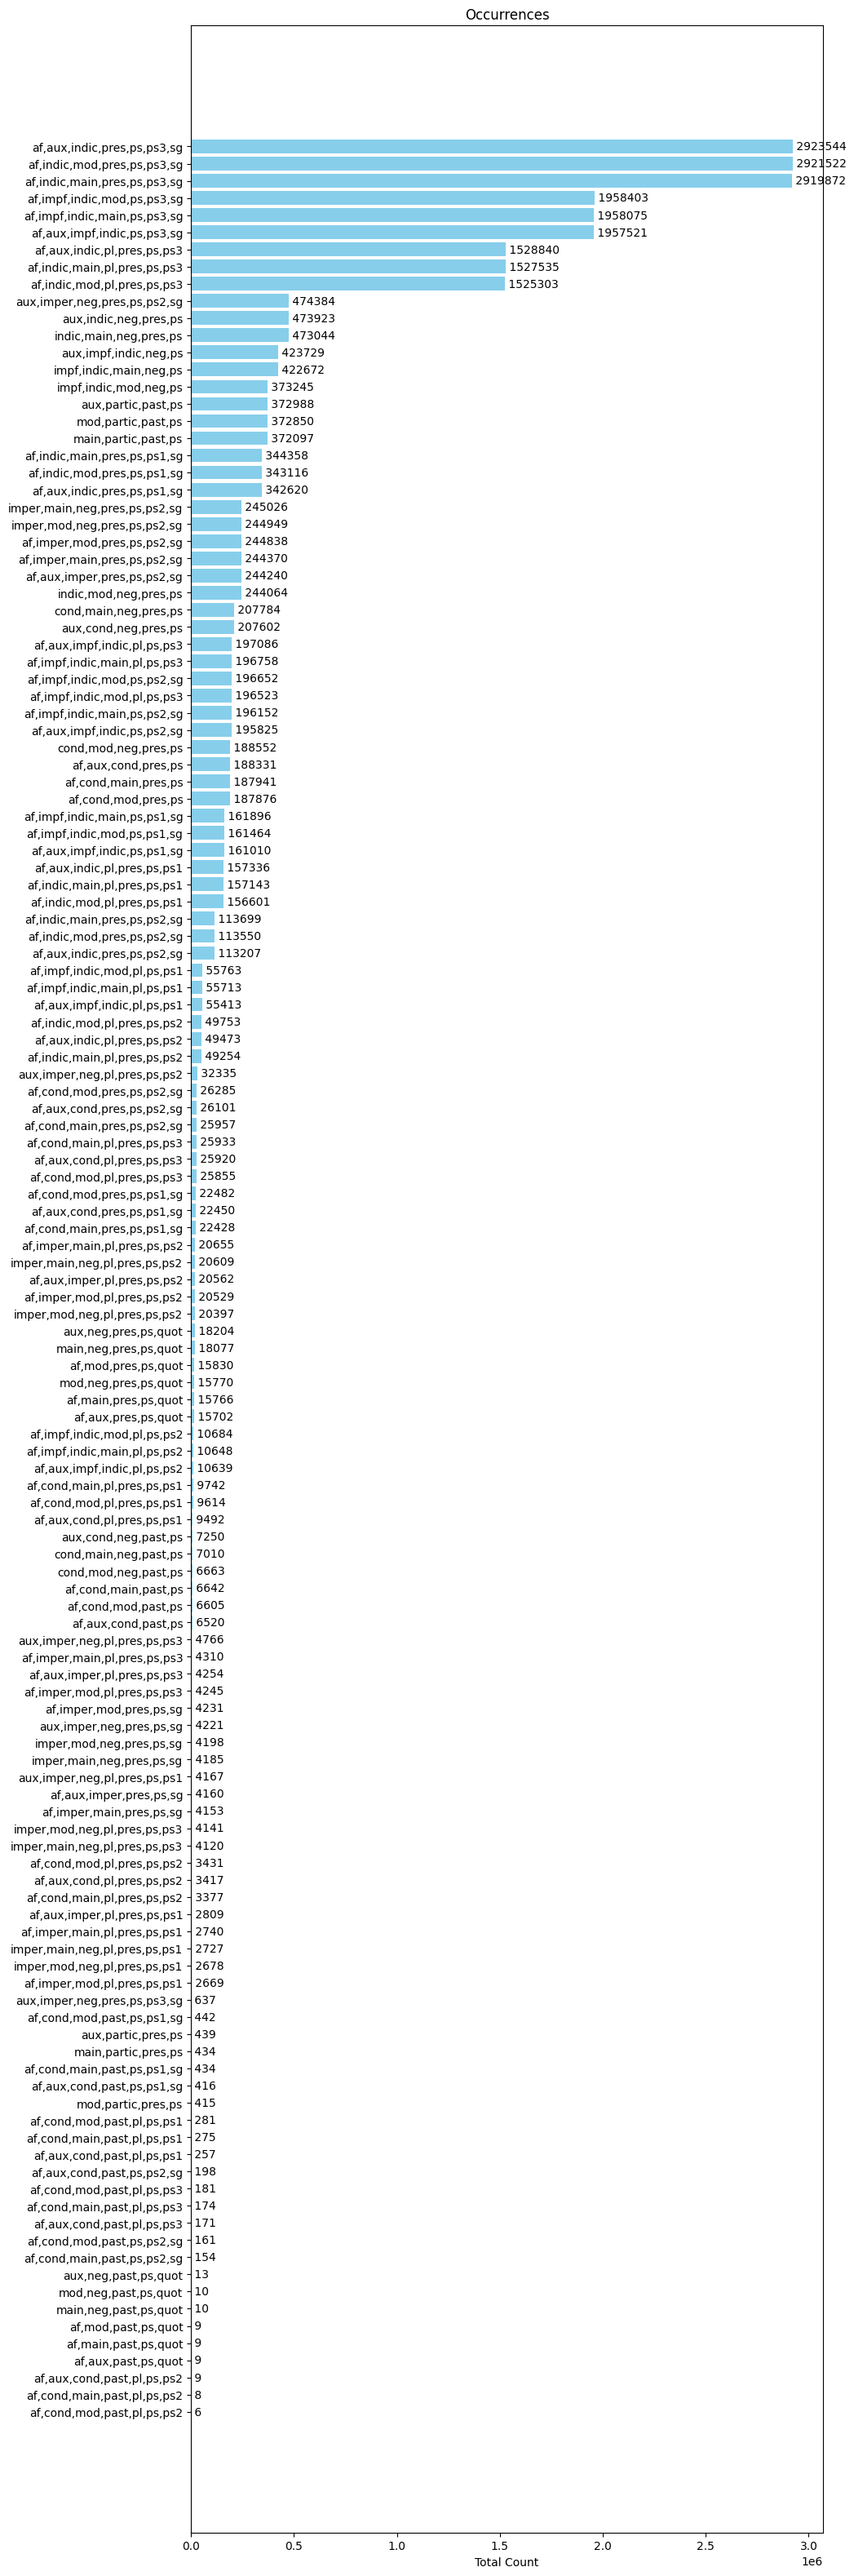

In [51]:
import pandas as pd
df = pd.read_sql("""
    select 
	feats as item, count(id) as total
	from `transaction_head` 
    group by feats
    order by total desc
    """, v30._conn
)
df

# Calculate percentages
total_sum = df['total'].sum()
df['percentage'] = (df['total'] / total_sum) * 100
df.to_csv('verb_feats_frequency.tsv', sep='\t', index=None)

display(df)
make_chart(df)


## Verbi alluvate arvu sagedus

,item,total,percentage
0,0 alluvat,10789973,35.872123
1,4 alluvat,4710449,15.660262
2,5 alluvat,3867515,12.857861
3,3 alluvat,3711901,12.340510
4,6 alluvat,2199131,7.311186
5,2 alluvat,1844056,6.130711
6,1 alluvat,1255352,4.173518
7,7 alluvat,998455,3.319443
8,8 alluvat,422005,1.402989
9,9 alluvat,177984,0.591722


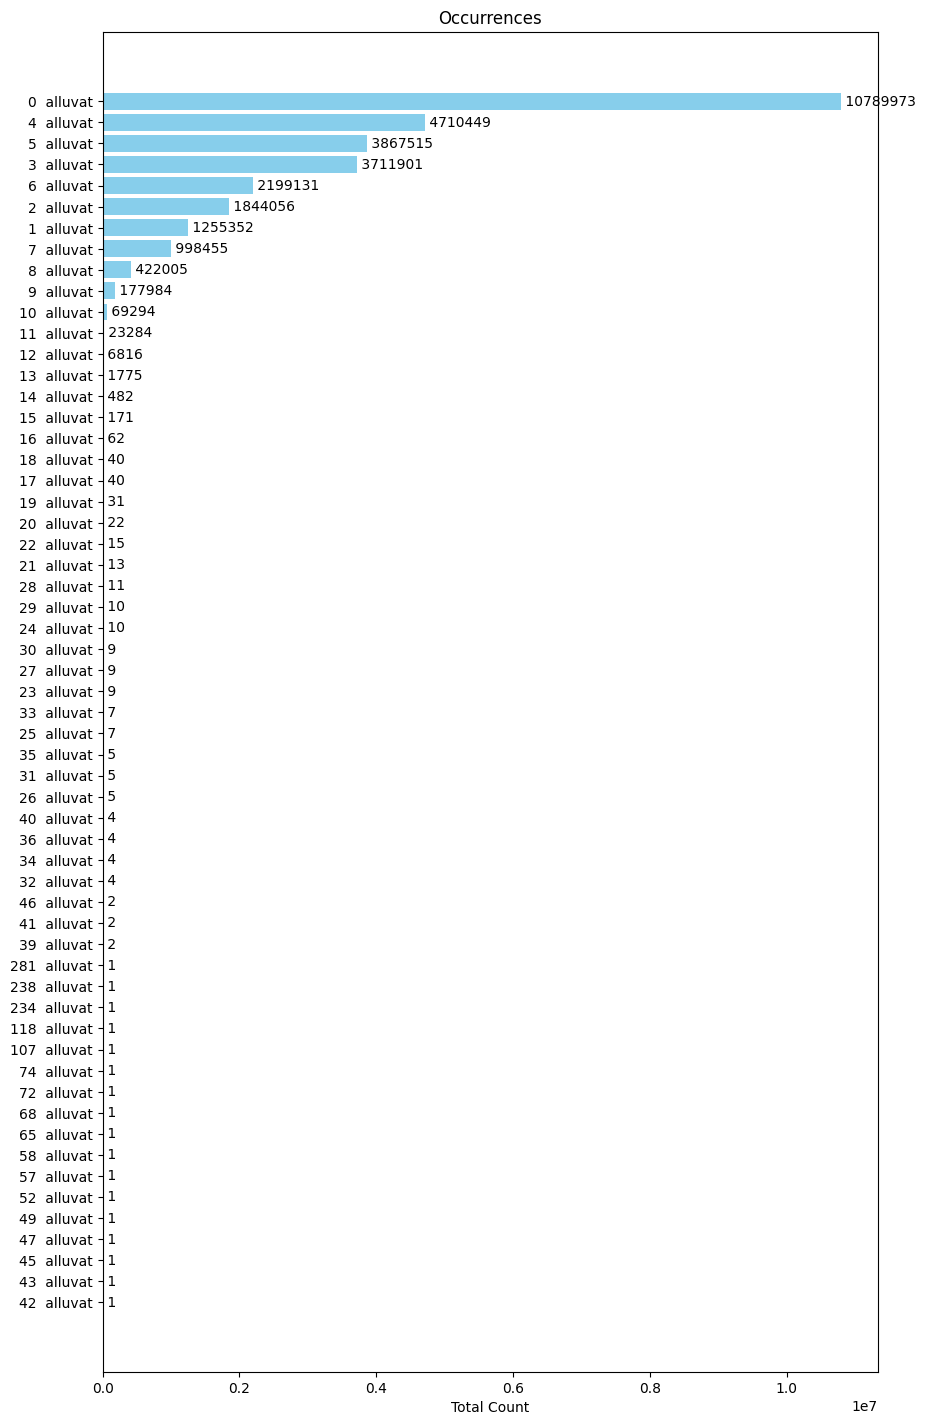

In [58]:
df = pd.read_sql("""
   SELECT 
    item_count || '  alluvat' as item,
    COUNT(*) as total
FROM (
    SELECT 
        `transaction_head`.id,
        COUNT(`transaction`.id) as item_count
    FROM `transaction_head`
    LEFT JOIN `transaction` ON `transaction_head`.id = `transaction`.head_id
    GROUP BY `transaction_head`.id
) AS subquery
GROUP BY item_count
ORDER BY total DESC;
    """, v30._conn
)
# Calculate percentages
total_sum = df['total'].sum()
df['item'] = df['item'] 
df['percentage'] = (df['total'] / total_sum) * 100
df.to_csv('members_deprel_frequency.tsv', sep='\t', index=None)
display(df)
make_chart(df)

## 0-alluvaga verbide feats sagedus

,item,total,percentage
0,"af,indic,mod,pres,ps,ps3,sg",1159747,10.748377
1,"af,indic,main,pres,ps,ps3,sg",1158838,10.739953
2,"af,aux,indic,pres,ps,ps3,sg",1158136,10.733447
3,"af,aux,indic,pl,pres,ps,ps3",957866,8.877372
4,"af,indic,main,pl,pres,ps,ps3",957537,8.874322
...,...,...,...
128,"af,cond,mod,past,pl,ps,ps2",4,0.000037
129,"af,cond,main,past,pl,ps,ps2",3,0.000028
130,"af,aux,past,ps,quot",3,0.000028
131,"af,main,past,ps,quot",2,0.000019


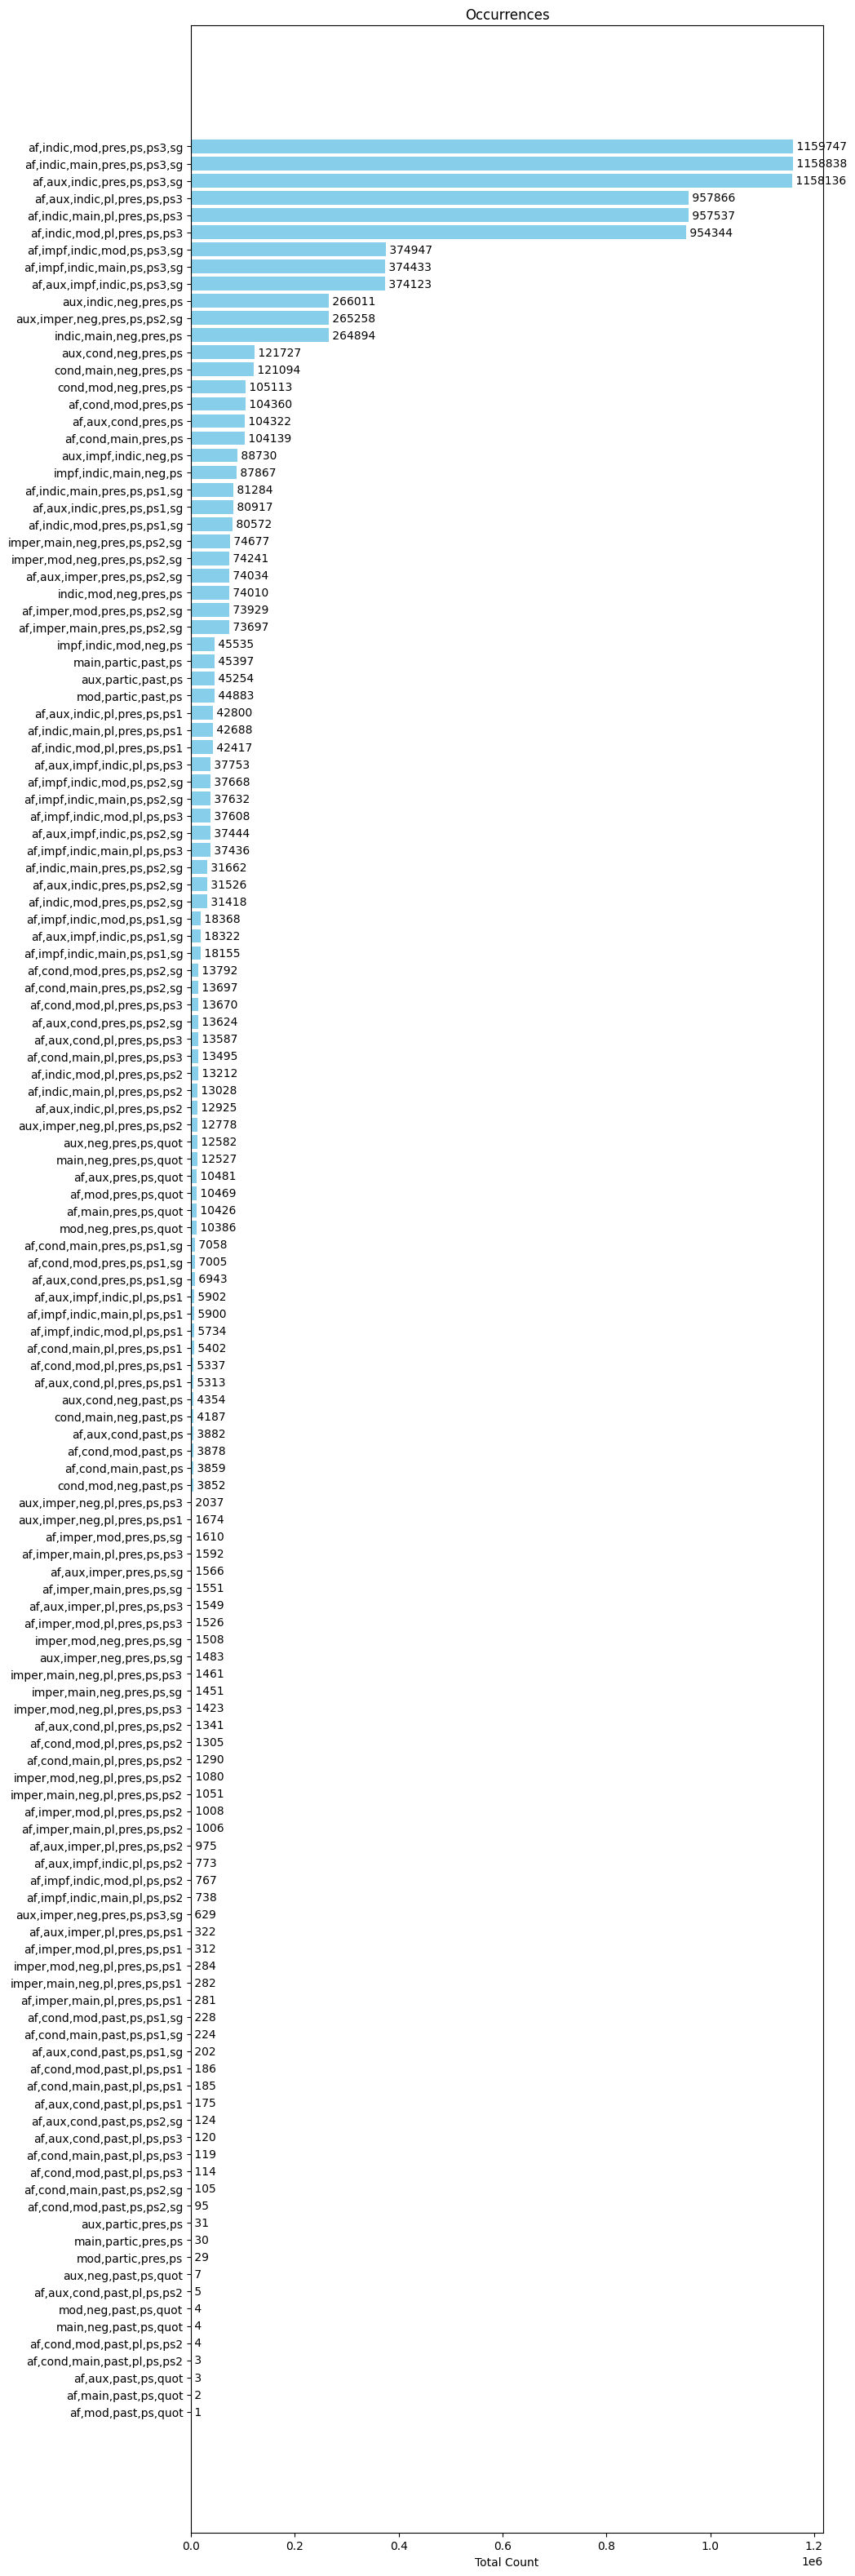

In [61]:
df = pd.read_sql("""
SELECT 
    subquery.feats AS item,
    COUNT(*) AS total
FROM (
    SELECT 
        `transaction_head`.feats,
        COUNT(`transaction`.id) AS item_count
    FROM `transaction_head`
    LEFT JOIN `transaction` ON `transaction_head`.id = `transaction`.head_id
    GROUP BY `transaction_head`.id
	HAVING item_count=0
    -- You can add conditions with the HAVING clause if needed, for example:
    -- HAVING COUNT(`transaction`.id) > 1
    -- If you want to limit the number of transaction_head records analyzed to 10:
) AS subquery
GROUP BY item
ORDER BY total DESC;
    """, v30._conn
)
# Calculate percentages
total_sum = df['total'].sum()
df['item'] = df['item'] 
df['percentage'] = (df['total'] / total_sum) * 100
df.to_csv('members_deprel_frequency.tsv', sep='\t', index=None)
display(df)
make_chart(df)